# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()
print(json.dumps(btc_price, indent=4))

# Fetch current ETH price
eth_price = requests.get(eth_url).json()
print(json.dumps(eth_price, indent=4))

# Compute current value of my crpto
current_btc_price = btc_price["data"]["1"]["quotes"]["USD"]["price"]
current_eth_price = eth_price["data"]["1027"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * current_btc_price
my_eth_value = my_eth * current_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18886893,
            "total_supply": 18886893,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 57122.0,
                    "volume_24h": 29904348135,
                    "market_cap": 1078865773081,
                    "percentage_change_1h": -0.450221746419243,
                    "percentage_change_24h": -0.353790908173936,
                    "percentage_change_7d": 1.3045633264388,
                    "percent_change_1h": -0.450221746419243,
                    "percent_change_24h": -0.353790908173936,
                    "percent_change_7d": 1.3045633264388
                },
                "CAD": {
                    "price": 72762.0036,
                    "volume_24h": 38092158654.363,
                   

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200 
my_spy = 50 

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("API_ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2021-11-29", tz="America/New_York"). isoformat() 

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio.head()

AGG                                     SPY  \
                             open   high     low   close   volume    open   
time                                                                        
2021-11-29 00:00:00-05:00  114.15  114.6  114.13  114.55  7604952  464.07   

                                                             
                             high     low   close    volume  
time                                                         
2021-11-29 00:00:00-05:00  466.56  461.73  464.63  68239627

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.55
Current SPY closing price: $464.63


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price 
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23231.50
The current value of your 200 AGG shares is $22910.00


### Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
shares = my_spy_value + my_agg_value 
crypto = my_btc_value + my_eth_value

d = [shares, crypto]

df_savings = pd.DataFrame(data=d, index=['shares', 'crypto'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
shares,46141.500
crypto,92111.207


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

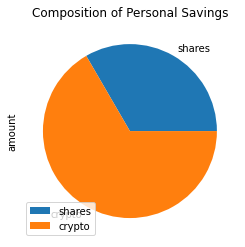

In [36]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title="Composition of Personal Savings")

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares + crypto 

# Validate saving health
if total_savings == emergency_fund:
        print('Congratulations! You have enough money in your emergency fund.')
elif total_savings > emergency_fund: 
        print('Congratulations! You have enough money in your emergency fund and have reached your financial goal')
elif total_savings < emergency_fund: 
        print(f'Unfortunately, you are ${total_savings-emergency_fund} away from your financial goal')
        

Congratulations! You have enough money in your emergency fund and have reached your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [53]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-11-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-11-30', tz='America/New_York').isoformat()

In [58]:
# Get 5 years' worth of historical data for SPY and AGG

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start= start_date,
    end=end_date, 
    limit=1000
).df




# Display stock data 
df_stock_data.sort_index()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2017-12-07 00:00:00-05:00  109.44  109.4600  109.1536  109.23  2430316.0   
2017-12-08 00:00:00-05:00  109.21  109.2900  109.1450  109.19  1533143.0   
2017-12-11 00:00:00-05:00  109.29  109.3200  109.1300  109.13  2475019.0   
2017-12-12 00:00:00-05:00  109.07  109.1100  108.9500  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.5500  109.1350  109.41  2638160.0   
...                           ...       ...       ...     ...        ...   
2021-11-22 00:00:00-05:00  114.14  114.2300  113.8200  113.88  6216218.0   
2021-11-23 00:00:00-05:00  113.71  113.7700  113.4500  113.45  5835080.0   
2021-11-24 00:00:00-05:00  113.47  113.7250  113.3905  113.72  5959367.0   
2021-11-26 00:00:00-05:00  114.28  114.5769  114.2000  114.54  2886169.0   
2021-11-29 00:00:00-05:00  114.15  114.6000  114.1300  114.55  7604952.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-12-07 00:00:00-05:00     NaN      NaN      NaN     NaN         NaN  
2017-12-08 00:00:00-05:00  265.01  265.520  264.720  265.49  41139547.0  
2017-12-11 00:00:00-05:00  265.57  266.380  265.490  266.34  38104278.0  
2017-12-12 00:00:00-05:00  266.59  267.320  266.345  266.79  46482549.0  
2017-12-13 00:00:00-05:00  267.06  267.560  266.650  266.73  48961663.0  
...                           ...      ...      ...     ...         ...  
2021-11-22 00:00:00-05:00  470.81  473.540  467.350  467.53  61497941.0  
2021-11-23 00:00:00-05:00  467.22  469.095  464.450  468.25  62851184.0  
2021-11-24 00:00:00-05:00  466.06  469.570  465.190  469.37  54274217.0  
2021-11-26 00:00:00-05:00  462.38  463.900  457.770  459.03  93783057.0  
2021-11-29 00:00:00-05:00  464.07  466.560  461.730  464.63  68239627.0  

[1001 rows x 10 columns]

In [59]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [60]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-12-07 00:00:00-05:00  109.44  109.46  109.1536  109.23  2430316.0   
2017-12-08 00:00:00-05:00  109.21  109.29  109.1450  109.19  1533143.0   
2017-12-11 00:00:00-05:00  109.29  109.32  109.1300  109.13  2475019.0   
2017-12-12 00:00:00-05:00  109.07  109.11  108.9500  109.10  2839614.0   
2017-12-13 00:00:00-05:00  109.23  109.55  109.1350  109.41  2638160.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-12-07 00:00:00-05:00          NaN     NaN     NaN      NaN     NaN   
2017-12-08 00:00:00-05:00    -0.000366  265.01  265.52  264.720  265.49   
2017-12-11 00:00:00-05:00    -0.000550  265.57  266.38  265.490  266.34   
2017-12-12 00:00:00-05:00    -0.000275  266.59  267.32  266.345  266.79   
2017-12-13 00:00:00-05:00     0.002841  267.06  267.56  266.650  266.73   

                                                    
                               volume daily_return  
time                                                
2017-12-07 00:00:00-05:00         NaN          NaN  
2017-12-08 00:00:00-05:00  41139547.0          NaN  
2017-12-11 00:00:00-05:00  38104278.0     0.003202  
2017-12-12 00:00:00-05:00  46482549.0     0.001690  
2017-12-13 00:00:00-05:00  48961663.0    -0.000225

In [61]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/conorhunt/Desktop/API Homework /MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011991,1.005173,1.007296,1.006734,0.992482,0.995876,0.990714,1.003216,0.996888,0.999145,...,0.993828,0.997172,0.991611,0.998266,1.001355,0.995385,0.999951,0.985561,1.004563,1.005042
2,1.010988,1.000699,0.999650,1.001489,0.981307,0.997481,0.990164,1.004310,0.990820,1.004443,...,0.989250,0.989319,1.000328,0.991362,1.009188,0.994254,1.007342,0.972494,1.007641,1.009616
3,1.025089,0.997146,0.997792,1.007136,0.986919,1.003505,0.991001,0.995517,0.993920,1.006138,...,0.985859,0.982497,1.010484,0.992943,1.007774,1.003557,1.003629,0.972337,1.011285,1.007211
4,1.022889,1.003190,1.002051,1.008998,0.986229,1.006557,0.983312,0.993041,1.003484,1.008339,...,0.987469,0.984886,1.006237,0.986886,1.012181,1.006681,1.007520,0.967568,1.022963,1.015970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.701094,14.909609,6.156321,7.956227,12.407643,6.231692,9.975153,11.970266,17.822747,13.210938,...,11.123058,6.274083,7.277924,12.748889,8.753361,4.702064,7.957071,5.209134,7.677005,5.136977
7557,11.639359,15.047227,6.168132,7.958648,12.467880,6.197778,10.010073,11.986810,17.660671,13.202746,...,11.166562,6.208252,7.258424,12.581504,8.744729,4.744977,7.955214,5.240477,7.717782,5.128564
7558,11.539925,14.999976,6.173384,7.899602,12.552192,6.246505,9.958652,11.956362,17.847973,13.209300,...,11.109741,6.280064,7.147561,12.601800,8.728806,4.696929,7.980321,5.260222,7.681628,5.115861
7559,11.562987,15.106059,6.153586,7.929656,12.574878,6.299858,9.948277,12.070555,17.888876,13.151598,...,11.106915,6.313231,7.133823,12.615844,8.743645,4.672440,7.941783,5.287683,7.603874,5.101983


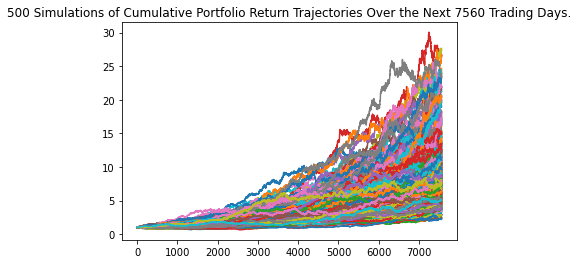

In [63]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

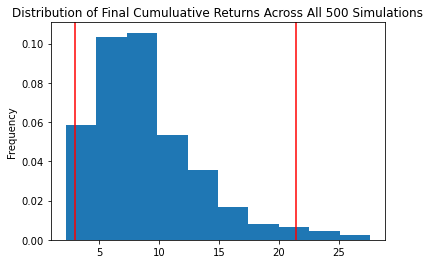

In [64]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [65]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.957130
std               4.520956
min               2.229220
25%               5.655230
50%               8.040607
75%              11.003048
max              27.615594
95% CI Lower      2.959720
95% CI Upper     21.449351
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [66]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59194.39 and $428987.02


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [68]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
new_ci_lower = round(tbl[8]*initial_investment,2)
new_ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${new_ci_lower} and ${new_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $88791.59 and $643480.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [69]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [70]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/conorhunt/Desktop/API Homework /MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999107,1.003207,1.008184,0.988175,1.005167,0.994198,1.004237,0.998778,1.004786,0.995898,...,0.998126,1.004796,1.011274,1.000855,0.994795,0.999828,0.993242,0.998679,1.004025,0.997494
2,0.998593,1.003811,1.012308,0.999316,1.001047,0.993015,0.998290,0.997759,1.000149,0.992754,...,0.998195,0.996490,1.008758,1.000855,0.986258,1.006387,0.995703,0.999321,1.012245,0.998098
3,0.999980,1.009704,1.007006,1.008738,0.994375,0.984683,0.993629,0.995385,1.003389,0.986254,...,1.000446,0.998875,1.013233,0.997062,0.988649,1.000692,0.990234,0.990245,1.003560,0.995917
4,1.003816,1.003758,1.010066,1.007691,0.990817,0.982170,0.998498,1.001560,1.003165,0.987514,...,1.010886,1.008149,1.017182,0.987149,0.983315,0.998503,0.987946,1.000519,1.008563,1.004376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.300494,1.469422,1.335890,2.085599,1.092430,1.326998,1.669397,1.492915,1.389592,1.403283,...,1.211554,1.320724,1.267705,1.314610,2.120269,1.759145,1.052561,0.834911,1.130617,2.013009
1257,1.301868,1.456744,1.331003,2.075551,1.089898,1.330676,1.650176,1.494061,1.369753,1.400398,...,1.215896,1.314734,1.275985,1.313309,2.120073,1.742872,1.054156,0.833401,1.125676,2.004511
1258,1.308842,1.459838,1.336709,2.083200,1.097795,1.323064,1.651570,1.494027,1.374080,1.393184,...,1.208718,1.324393,1.288981,1.317186,2.117873,1.737124,1.044624,0.836363,1.123210,2.018631
1259,1.320216,1.456644,1.328768,2.074489,1.090141,1.325261,1.650189,1.488520,1.378827,1.389929,...,1.205416,1.334093,1.292206,1.309989,2.101257,1.737206,1.051616,0.837351,1.120435,2.013334


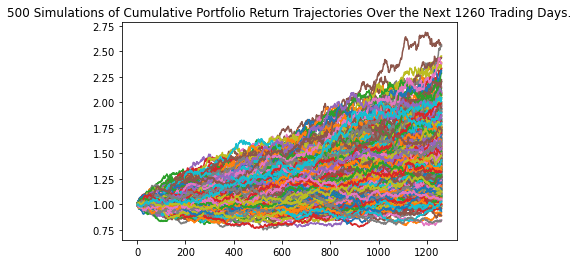

In [72]:
# Plot simulation outcomes
line_plot_fiveyear = MC_fiveyear.plot_simulation()

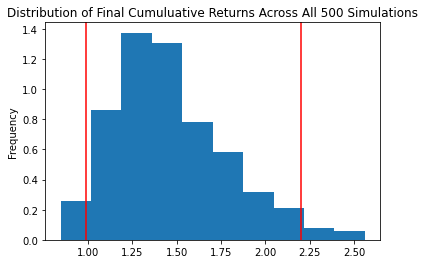

In [73]:
# Plot probability distribution and confidence intervals
dist_plot_fiveyear = MC_fiveyear.plot_distribution()

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
tble = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tble)

count           500.000000
mean              1.461210
std               0.318974
min               0.844231
25%               1.228770
50%               1.417512
75%               1.649278
max               2.561274
95% CI Lower      0.987973
95% CI Upper      2.203683
Name: 1260, dtype: float64


In [77]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tble[8]*initial_investment,2)
ci_upper_five = round(tble[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19759.45 and $44073.67


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


In [74]:
# Show Simulation Outcomes 


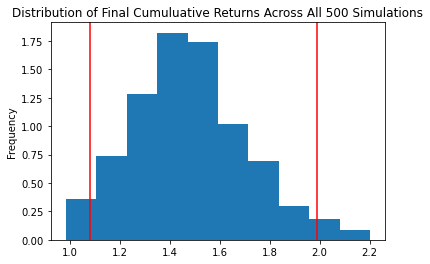

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
